## Predict Credit Card Default

Dataset: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

        LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
count    30000.00  30000.00   30000.00  30000.00  30000.00  30000.00   
mean    167484.32      1.60       1.85      1.55     35.49     -0.02   
std     129747.66      0.49       0.79      0.52      9.22      1.12   
min      10000.00      1.00       0.00      0.00     21.00     -2.00   
25%      50000.00      1.00       1.00      1.00     28.00     -1.00   
50%     140000.00      2.00       2.00      2.00     34.00      0.00   
75%     240000.00      2.00       2.00      2.00     41.00      0.00   
max    1000000.00      2.00       6.00      3.00     79.00      8.00   

          PAY_2     PAY_3     PAY_4     PAY_5    ...     BILL_AMT4  BILL_AMT5  \
count  30000.00  30000.00  30000.00  30000.00    ...      30000.00   30000.00   
mean      -0.13     -0.17     -0.22     -0.27    ...      43262.95   40311.40   
std        1.20      1.20      1.17      1.13    ...      64332.86   60797.16   
min       -2.00     -2.00  

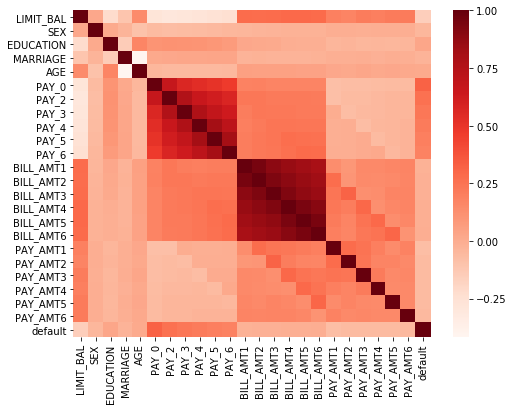

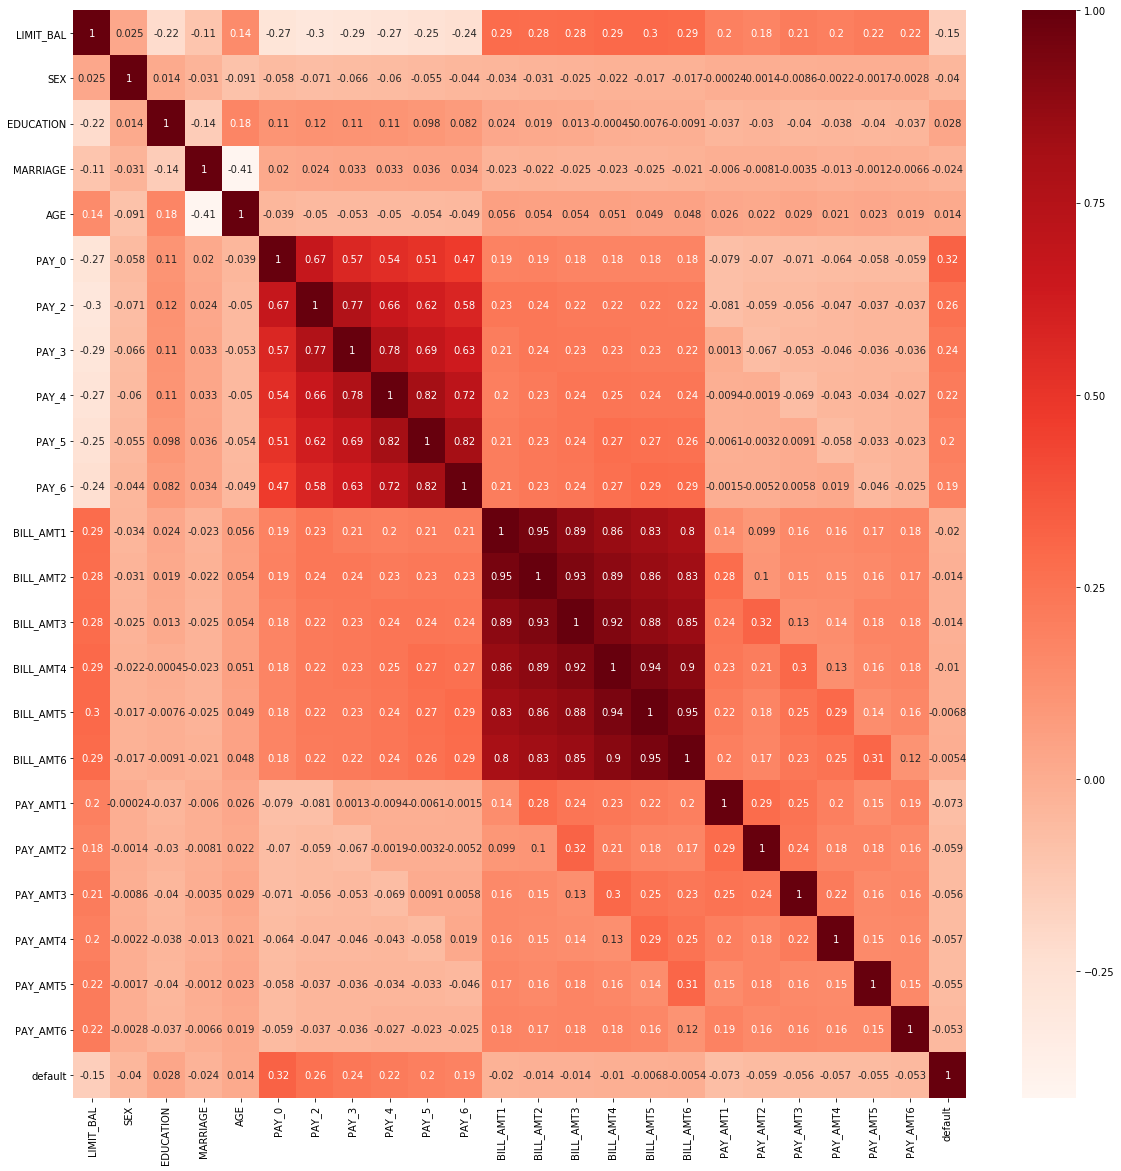

In [19]:
# Compare Algorithms
# From scikit learn tutorial
# With modification by Nick Webb

%matplotlib inline

# Pandas is an important data manipulation library
# You don't have to use it for your project, but I include it
# here so you know about it.

import pandas
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# And import the feature selection mechanism
from sklearn.feature_selection import RFE

# load dataset, using pandas

names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
           'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2' ,'BILL_AMT3','BILL_AMT4','BILL_AMT5', 'BILL_AMT6',
         'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default']

dataframe = pandas.read_csv('default_original.csv', names=names)

# get data from data frames, as numpy arrays
array = dataframe.values
X = array[:,0:23]
y = array[:,23]

#Descriptive Statistics
pandas.set_option('precision', 2)
description = dataframe.describe()
print(description)

# Heat Map
plt.figure(figsize=(8,6))
cor = dataframe.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()


# plt.figure(figsize=(20,20))
# cor = dataframe.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

# Scatter Matrix
# from pandas.plotting import scatter_matrix
# scatter_matrix(dataframe, alpha=0.2, figsize=(30, 30), diagonal='kde')
# plt.show()

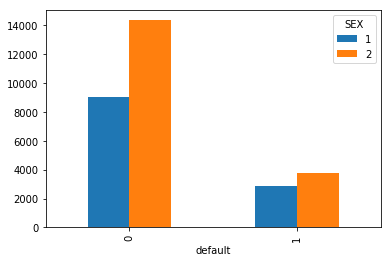

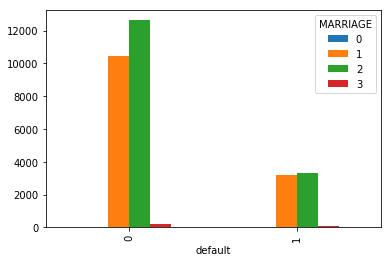

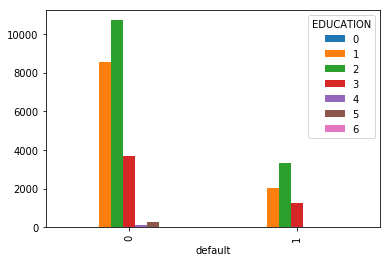

In [21]:
# Explore the data with categorical attribute

data_sex = dataframe.groupby(['default', 'SEX']).size()
data_sex.unstack(level=1).plot(kind='bar')

data_marriage = dataframe.groupby(['default', 'MARRIAGE']).size()
data_marriage.unstack(level=1).plot(kind='bar')

data_education = dataframe.groupby(['default', 'EDUCATION']).size()
data_education.unstack(level=1).plot(kind='bar')


In [3]:
# prepare configuration for cross validation test harness
seed = 1

# Run all models with 10-fold classification
def model_report(x, y, models):
    results = []
    classifiers = []
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        classifiers.append(name)
        msg = "%s: %f %f (%f)" % (name, cv_results.max(), cv_results.mean(), cv_results.std())
        print(msg)
    return results, classifiers

# boxplot algorithm comparison
def model_plot(results, classifiers):
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()

ZR: 0.808667 0.778800 (0.017234)
LR: 0.808667 0.778733 (0.017226)
KN10: 0.801333 0.774133 (0.015066)
DT: 0.747667 0.725067 (0.011701)
NB: 0.390333 0.377867 (0.008978)
SVM: 0.810333 0.779433 (0.017651)
NN: 0.397000 0.359933 (0.016008)
GB: 0.850333 0.821300 (0.014935)
ADA: 0.840333 0.816567 (0.013625)


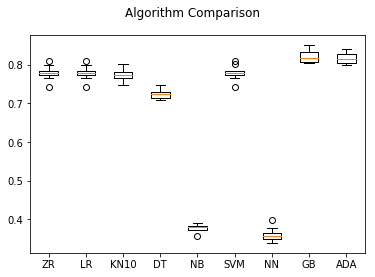

In [4]:
# prepare models
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN10', KNeighborsClassifier(n_neighbors=10)))
models.append(('DT', DecisionTreeClassifier(random_state = 1)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('LINSVM', LinearSVC(C=0.01, penalty="l2", dual=False)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# Boosting
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

num_trees = 100
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)))
#models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('ADA',AdaBoostClassifier()))


# Initial Dataset
outcome = model_report(X, y, models)
model_plot(outcome[0], outcome[1])

In [15]:
#t-tes
results0 = outcome[0]

ttest,pval = stats.ttest_rel(results0[0], results0[1])
print('P-Val between ZeroR and Logistic Regression: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()    
    
ttest,pval = stats.ttest_rel(results0[0], results0[5])
print('P-Val between ZeroR and SVM: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print() 

ttest,pval = stats.ttest_rel(results0[0], results0[7])
print('P-Val between ZeroR and Gradient Boosting: %.2f' % pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 
print() 

ttest,pval = stats.ttest_rel(results0[0], results0[8])
print('P-Val between ZeroR and AdaBoost: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 
print() 
    
ttest,pval = stats.ttest_rel(results0[7], results0[8])
print('P-Val between AdaBoost and Gradient Boostings: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")   
print()  

P-Val between ZeroR and Logistic Regression: 0.17
accept null hypothesis

P-Val between ZeroR and SVM: 0.16
accept null hypothesis

P-Val between ZeroR and Gradient Boosting: 0.00
reject null hypothesis

P-Val between ZeroR and AdaBoost: 0.00
reject null hypothesis

P-Val between AdaBoost and Gradient Boostings: 0.00
reject null hypothesis



Feature names: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']
Feature ranking: [ 9  1  1  1  1  1  1  1  1  1  1  4  3 11 13  8 10  1  2  6  5  7 12]
Optimization terminated successfully.
         Current function value: 0.469939
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                30000
Model:                          Logit   Df Residuals:                    29989
Method:                           MLE   Df Model:                           10
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:                  0.1107
Time:                        11:07:41   Log-Likelihood:                -14098.
converged:                       True   LL-Null:     

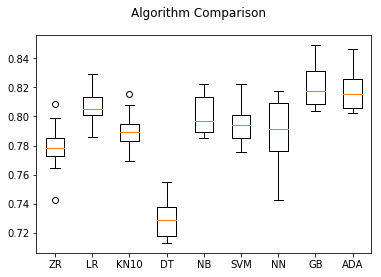

In [9]:
# Feature Selection using RFE

from sklearn.feature_selection import RFE

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",names)
print("Feature ranking:",rfe.ranking_)

newCols = []
index = 0
for i in rfe.ranking_:
    if i == 1:
        newCols.append(names[index])
    index+=1
newCols.append('class')  

newData = dataframe[dataframe.columns[dataframe.columns.isin(newCols)]]
newArray = newData.values
X_filter2 = newArray[:,0:11]
import statsmodels.api as sm
from scipy import stats

logit_model=sm.Logit(y,X_filter2)
result=logit_model.fit()
print(result.summary())

outcome3 = model_report(X_filter2, y, models)
model_plot(outcome3[0], outcome3[1])

In [16]:
# t-tests
print('\n***Performing t-tests***\n\n')

results0 = outcome[0]
results1 = outcome3[0]

ttest,pval = stats.ttest_rel(results1[0], results1[1])
print('P-Val between ZeroR and Logistic Regression: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()  

ttest,pval = stats.ttest_rel(results1[0], results1[2])
print('P-Val between ZeroR and KNN: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()  

ttest,pval = stats.ttest_rel(results1[0], results1[4])
print('P-Val between ZeroR and Naive Bayes: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()  

ttest,pval = stats.ttest_rel(results1[0], results1[5])
print('P-Val between ZeroR and SVM: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print() 

ttest,pval = stats.ttest_rel(results1[0], results1[6])
print('P-Val between ZeroR and Neural Network: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print() 
    
ttest,pval = stats.ttest_rel(results1[0], results1[7])
print('P-Val between ZeroR and Gradient Boosting: %.2f' % pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 
print()   

ttest,pval = stats.ttest_rel(results1[0], results1[8])
print('P-Val between ZeroR and AdaBoost: %.2f' % pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 
print()   
    
ttest,pval = stats.ttest_rel(results1[7], results1[8])
print('P-Val between Logistic Regression and Gradient Boostings: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")   
print()  

ttest,pval = stats.ttest_rel(results1[7], results1[8])
print('P-Val between AdaBoost and Gradient Boostings: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
print()   

ttest,pval = stats.ttest_rel(results0[7], results1[7])
print('P-Val between Gradient Boostings (initial data) and Gradient Boostings (filter): %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")


***Performing t-tests***


P-Val between ZeroR and Logistic Regression: 0.00
reject null hypothesis

P-Val between ZeroR and KNN: 0.00
reject null hypothesis

P-Val between ZeroR and Naive Bayes: 0.00
reject null hypothesis

P-Val between ZeroR and SVM: 0.00
reject null hypothesis

P-Val between ZeroR and Neural Network: 0.02
reject null hypothesis

P-Val between ZeroR and Gradient Boosting: 0.00
reject null hypothesis

P-Val between ZeroR and AdaBoost: 0.00
reject null hypothesis

P-Val between Logistic Regression and Gradient Boostings: 0.01
reject null hypothesis

P-Val between AdaBoost and Gradient Boostings: 0.01
reject null hypothesis

P-Val between Gradient Boostings (initial data) and Gradient Boostings (filter): 0.56
accept null hypothesis
